In [4]:
import poisson_atac as patac
import scanpy as sc
import os
import scipy.io

In [8]:
import pandas as pd

In [13]:
import anndata as ad

# Load data

In [5]:
data_path = os.path.join("/storage/groups/ml01/workspace/laura.martens/moretti_colab/archr_final", "Epicardiods")

In [6]:
with open(os.path.join(data_path, 'matrix.mtx'), 'rb') as mm:
    x = scipy.io.mmread(mm).T.tocsr()

In [7]:
x

<39738x416330 sparse matrix of type '<class 'numpy.int64'>'
	with 310134965 stored elements in Compressed Sparse Row format>

In [9]:
obs = pd.read_csv(os.path.join(data_path, 'obs.csv'), sep=',')

In [10]:
var = pd.read_csv(os.path.join(data_path, 'var.csv'), sep=',')

In [11]:
var

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,distToGeneStart,nearestGene,peakType,distToTSS,nearestTSS,GC,idx,N
1,chr1,761952,762452,501,*,4.51585,0.363,0.123,2,C4._.MUC26654_1234,699,LINC00115,Promoter,699,uc001aau.3,0.5509,1,0
2,chr1,762677,763177,501,*,75.74220,0.988,0.974,4,C5._.Other,24,LINC00115,Promoter,24,uc001aau.3,0.6886,2,0
3,chr1,766607,767107,501,*,216.68600,0.913,0.876,3,C13._.MUC26652_1234,3885,LINC01128,Intronic,3678,uc021oeh.1,0.4112,3,0
4,chr1,767460,767960,501,*,12.82010,0.812,0.634,3,C2._.MUC26654_1234,4738,LINC01128,Intronic,4531,uc021oeh.1,0.5449,4,0
5,chr1,779956,780456,501,*,30.43570,0.701,0.541,3,C7._.MUC26651_1234,17234,LINC01128,Intronic,17027,uc021oeh.1,0.5130,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416326,chrX,154996996,154997496,501,*,325.82500,0.940,0.915,4,C13._.MUC26652_1234,154623,TMLHE,Distal,204,uc004cin.3,0.5449,10462,0
416327,chrX,154997892,154998392,501,*,3.95652,0.393,0.143,2,C9._.MUC26650_1234,155519,TMLHE,Distal,690,uc004cin.3,0.4790,10463,0
416328,chrX,154999308,154999808,501,*,5.26777,0.493,0.245,2,C9._.MUC26649_1234,156935,TMLHE,Distal,2106,uc004cin.3,0.3972,10464,0
416329,chrX,155006613,155007113,501,*,3.06260,0.279,0.069,2,C4._.MUC26653_1234,164240,TMLHE,Distal,3328,uc004cin.3,0.4192,10465,0


In [12]:
var.index = var.seqnames + ":" + var.start.astype(str) + "-" + var.end.astype(str)

In [14]:
adata = ad.AnnData(X=x, obs=obs, var=var)
adata.var_names_make_unique()

/tmp/ipykernel_123884/1750927739.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=x, obs=obs, var=var)


In [15]:
adata.write(os.path.join(data_path, 'adata.h5ad'))

In [16]:
import scanpy as sc

In [17]:
sc.pp.filter_genes(adata, min_cells = int(adata.shape[0]*0.01))

In [18]:
adata.write(os.path.join(data_path, 'adata_filtered.h5ad'))

In [19]:
adata = sc.read(os.path.join(data_path, "adata_filtered.h5ad"))

In [20]:
adata

AnnData object with n_obs × n_vars = 39738 × 176750
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'DoubletScore', 'DoubletEnrichment', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'day'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N', 'n_cells'

# Plot statistics

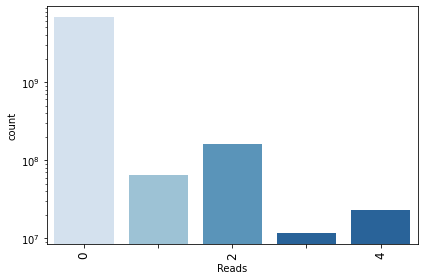

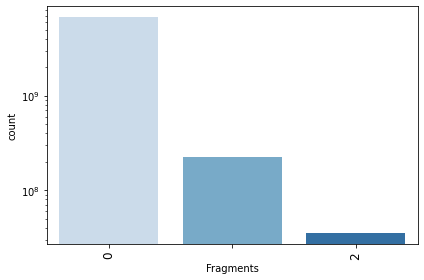

In [21]:
patac.pl.count_distribution(adata)

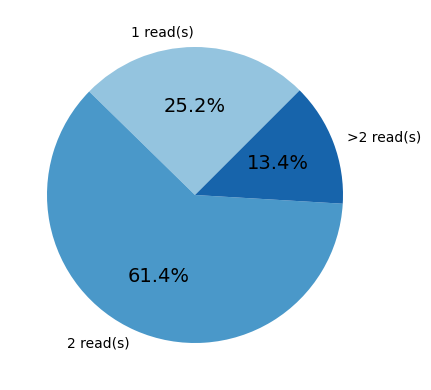

In [22]:
patac.pl.proportions(adata, upper_limit=2, lower_limit=1)

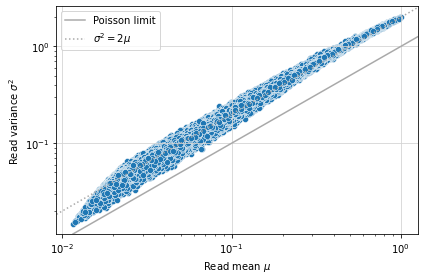

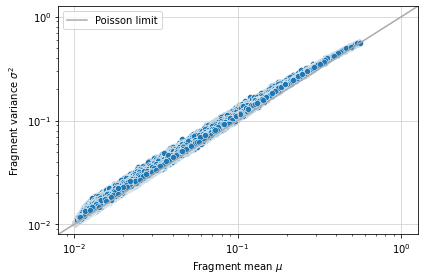

In [23]:
patac.pl.mean_variance(adata)

# Train model

In [24]:
patac.data.reads_to_fragments(adata, key_added="counts")

In [25]:
patac.model.PoissonVI.setup_anndata(adata, batch_key="Sample", layer="counts")

In [26]:
model = patac.model.PoissonVI(adata, n_latent=50)

In [29]:
model.view_anndata_setup()

Anndata setup with scvi-tools version 0.0.0.

Setup via `PoissonVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': 'Sample',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_cells          │ 39738  │
│          n_vars          │ 176750 │
│         n_batch          │   7    │
│         n_labels         │   1    │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │ MUC26649_1234 │          0          │
│                     │ MUC26650_1234 │          1          │
│                     │ MUC26651_1234 │          2          │
│                     │ MUC26652_1234 │          3          │
│                     │ MUC26653_1234 │          4          │
│                     │ MUC26654_1234 │          5          │
│                     │ MUC26655_1234 │          6          │
└─────────────────────┴───────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [28]:
6

6

In [30]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 77/500:  15%|█▌        | 77/500 [38:08<3:29:31, 29.72s/it, loss=2.35e+04, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 23128.014. Signaling Trainer to stop.


In [31]:
X_emb = model.get_latent_representation()

In [32]:
def compute_embedding(adata, X_emb):      
    adata.obsm['X_emb'] = X_emb
    
    if 'X_umap' in adata.obsm.keys():
        adata.obsm.pop('X_umap')
    if 'umap' in adata.obsm.keys():
        adata.obsm.pop('umap')  
    if 'neighbors' in adata.uns.keys():
        adata.uns.pop('neighbors')
    sc.pp.neighbors(adata, use_rep='X_emb')
    sc.tl.umap(adata)

In [33]:
compute_embedding(adata, X_emb)

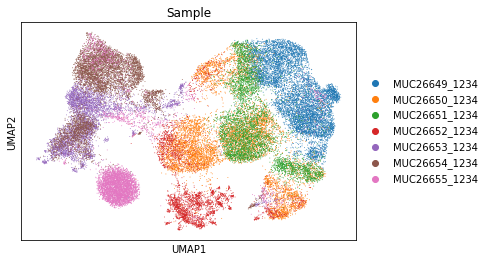

In [34]:
sc.pl.umap(adata, color = "Sample")

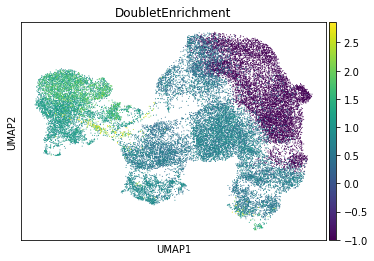

In [39]:
sc.pl.umap(adata, color = "DoubletEnrichment")

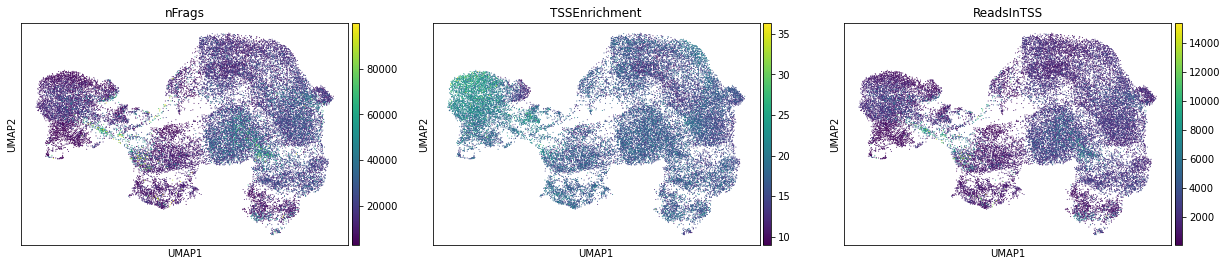

In [66]:
sc.pl.umap(adata, color=["nFrags", "TSSEnrichment", "ReadsInTSS"])

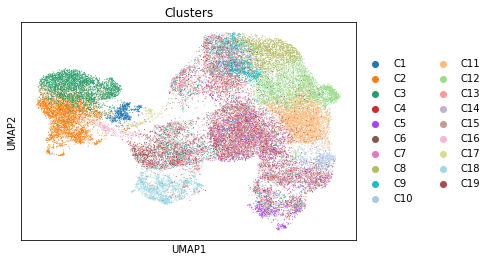

In [42]:
sc.pl.umap(adata, color = "Clusters")

# Look at MUC26649

In [50]:
adata_49 = adata[adata.obs.Sample.isin(["MUC26649_1234"])].copy()

In [51]:
patac.model.PoissonVI.setup_anndata(adata_49, batch_key="Sample", layer="counts")

In [52]:
model_49 = patac.model.PoissonVI(adata_49)

In [53]:
model_49.view_anndata_setup()

Anndata setup with scvi-tools version 0.0.0.

Setup via `PoissonVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': 'Sample',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_cells          │  8916  │
│          n_vars          │ 203828 │
│         n_batch          │   1    │
│         n_labels         │   1    │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │ MUC26649_1234 │          0          │
└─────────────────────┴───────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [54]:
model_49.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 77/500:  15%|█▌        | 77/500 [10:35<58:13,  8.26s/it, loss=3.13e+04, v_num=1]  
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 32061.822. Signaling Trainer to stop.


In [55]:
X_emb = model_49.get_latent_representation()

In [57]:
compute_embedding(adata_49, X_emb)

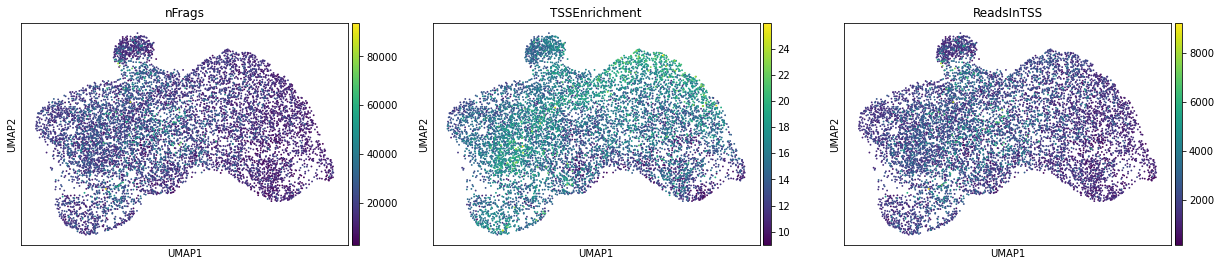

In [63]:
sc.pl.umap(adata_49, color=["nFrags", "TSSEnrichment", "ReadsInTSS"])

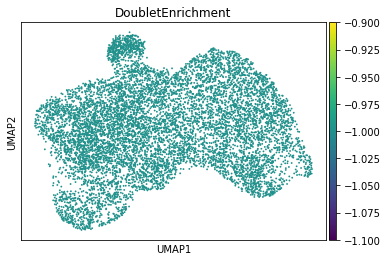

In [65]:
sc.pl.umap(adata_49, color=["DoubletEnrichment"])